In [26]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [27]:
tk = th.Thicket.from_caliperreader(glob("SpeedupMerge/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 35/35 [00:00<00:00, 476.31it/s]
/home/joserojo77/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [28]:
tk.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197811821,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p512-a268435456-smerge-irandom.cali,true,true,true,true,1729638574,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, merge, random]",c,merge,mpi,int,4,268435456,random,512,8,online,weak
272614657,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a268435456-smerge-irandom.cali,true,true,true,true,1729628090,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, merge, random]",c,merge,mpi,int,4,268435456,random,64,8,online,weak
410978651,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a268435456-smerge-ireverse.cali,true,true,true,true,1729628014,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, merge, reverse]",c,merge,mpi,int,4,268435456,reverse,128,8,online,weak
487591188,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a268435456-smerge-isorted.cali,true,true,true,true,1729627893,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, merge, sorted]",c,merge,mpi,int,4,268435456,sorted,32,8,online,weak
620079786,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a268435456-smerge-i1perturbed.cali,true,true,true,true,1729628090,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, merge, 1perturbed]",c,merge,mpi,int,4,268435456,1perturbed,64,8,online,weak


In [29]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1156.368 main
├─ 1150.734 MPI_Comm_dup
├─ 0.112 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.228 comm
│  ├─ 0.135 comm_large
│  │  ├─ 0.048 MPI_Gather
│  │  └─ 0.086 MPI_Scatter
│  └─ 0.094 comm_small
│     └─ 0.094 MPI_Bcast
├─ 2.600 comp
│  ├─ 2.237 comp_large
│  └─ 0.363 comp_small
├─ 0.014 correctness_check
└─ 0.845 data_init_runtime
   └─ 0.827 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 1156.37 indices: {'profile': np.int64(197811821)})
█ 1040.73 - 1156.37
█ 809.46 - 1040.73
█ 578.18 - 809.46
█ 346.91 - 578.18
█ 115.64 - 346.91
█ 0.00 - 115.64

name User code    ◀  Only in left graph    ▶  Only in right graph



In [30]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("algorithm")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,"{'name': 'main', 'type': 'function'}",197811821,1.0,regionprofile,1156.333862,1156.386687,1156.367769,592060.297542,0.000093,1.742983,1.932726,1.834050,939.033432,NaN,NaN,NaN,NaN,main,512,random,268435456,merge
1,"{'name': 'main', 'type': 'function'}",272614657,1.0,regionprofile,163.018609,163.026996,163.023428,10433.499385,0.000009,1.525614,1.543076,1.533261,98.128735,NaN,NaN,NaN,NaN,main,64,random,268435456,merge
2,"{'name': 'main', 'type': 'function'}",410978651,1.0,regionprofile,192.293854,192.549152,192.475393,24636.850273,0.011034,1.831503,2.631753,2.062007,263.936862,NaN,NaN,NaN,NaN,main,128,reverse,268435456,merge
3,"{'name': 'main', 'type': 'function'}",487591188,1.0,regionprofile,87.446203,87.453228,87.449933,2798.397861,0.000006,1.552707,1.565271,1.560278,49.928901,NaN,NaN,NaN,NaN,main,32,sorted,268435456,merge
4,"{'name': 'main', 'type': 'function'}",620079786,1.0,regionprofile,158.141546,158.159816,158.149242,10121.551503,0.000061,1.555259,1.588935,1.573191,100.684222,NaN,NaN,NaN,NaN,main,64,1perturbed,268435456,merge


In [31]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

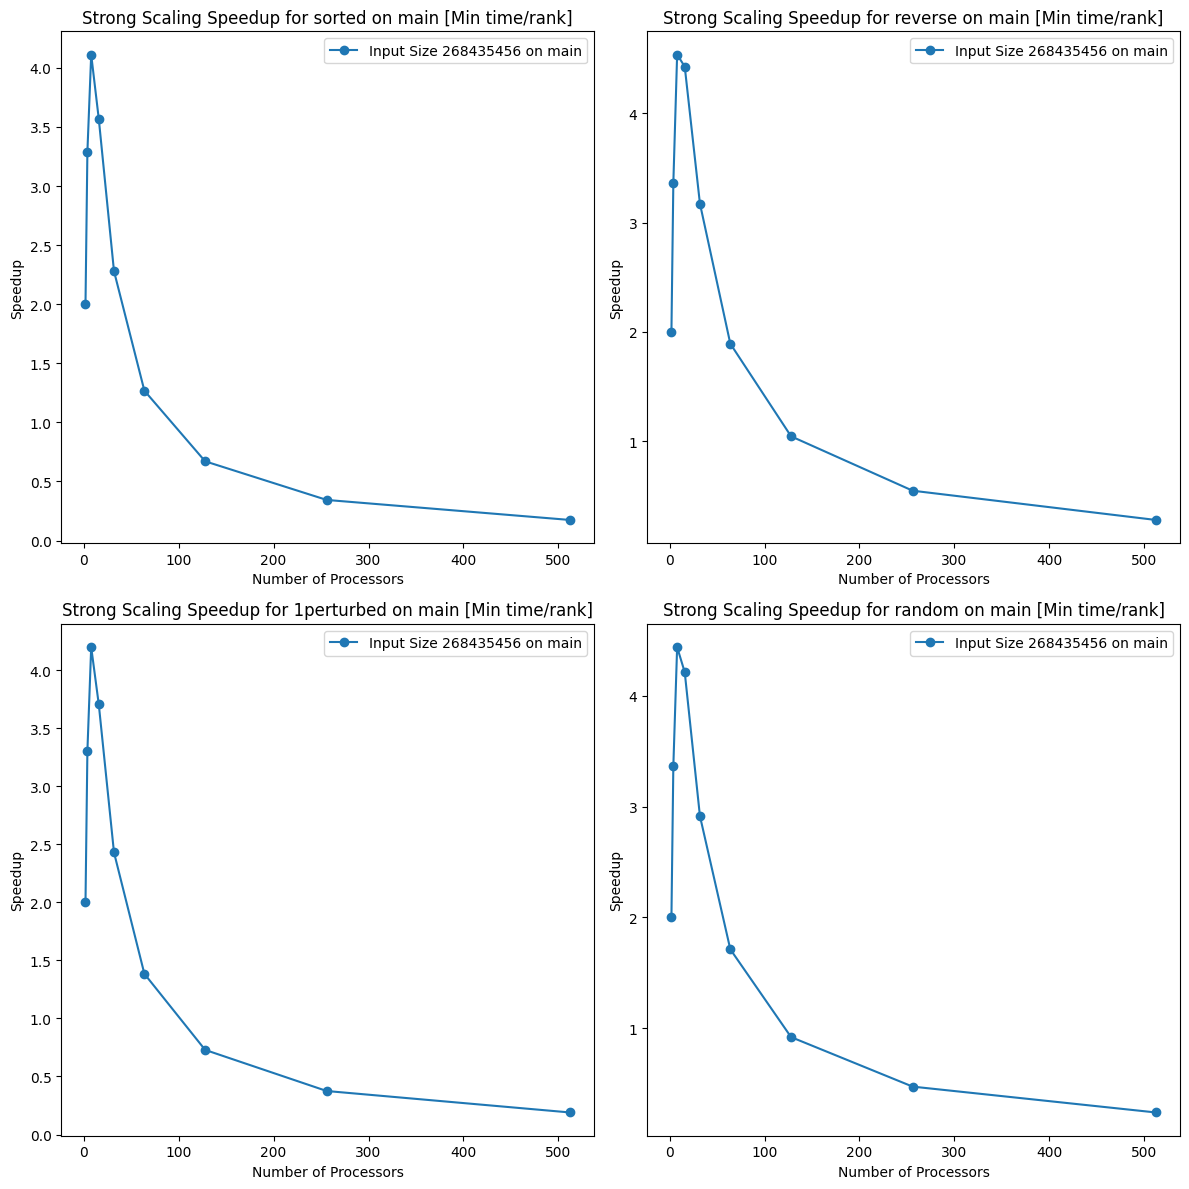

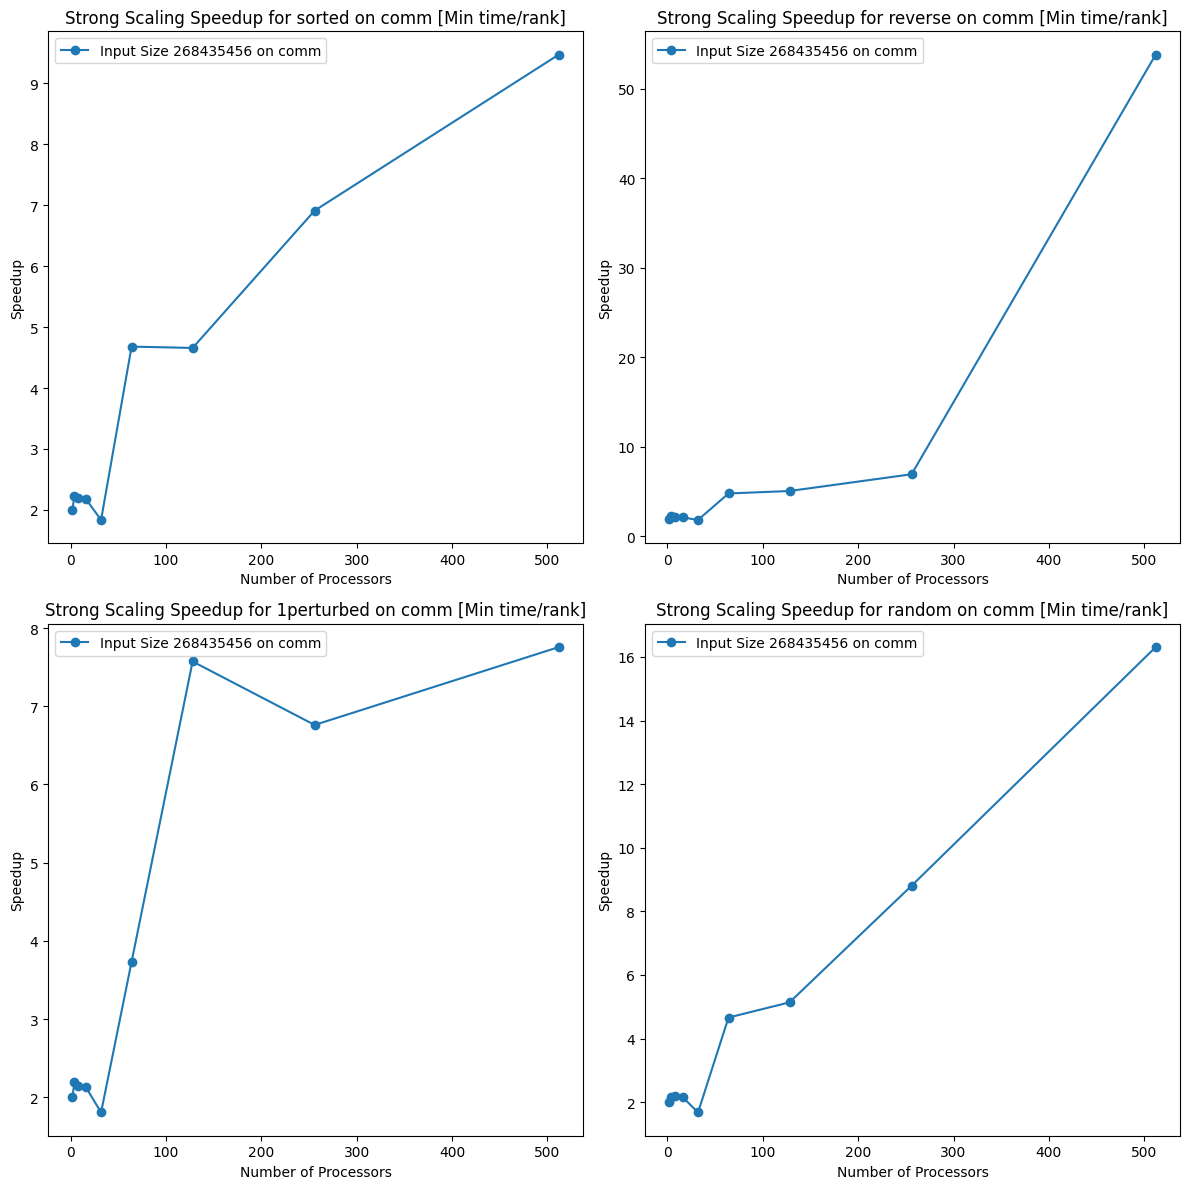

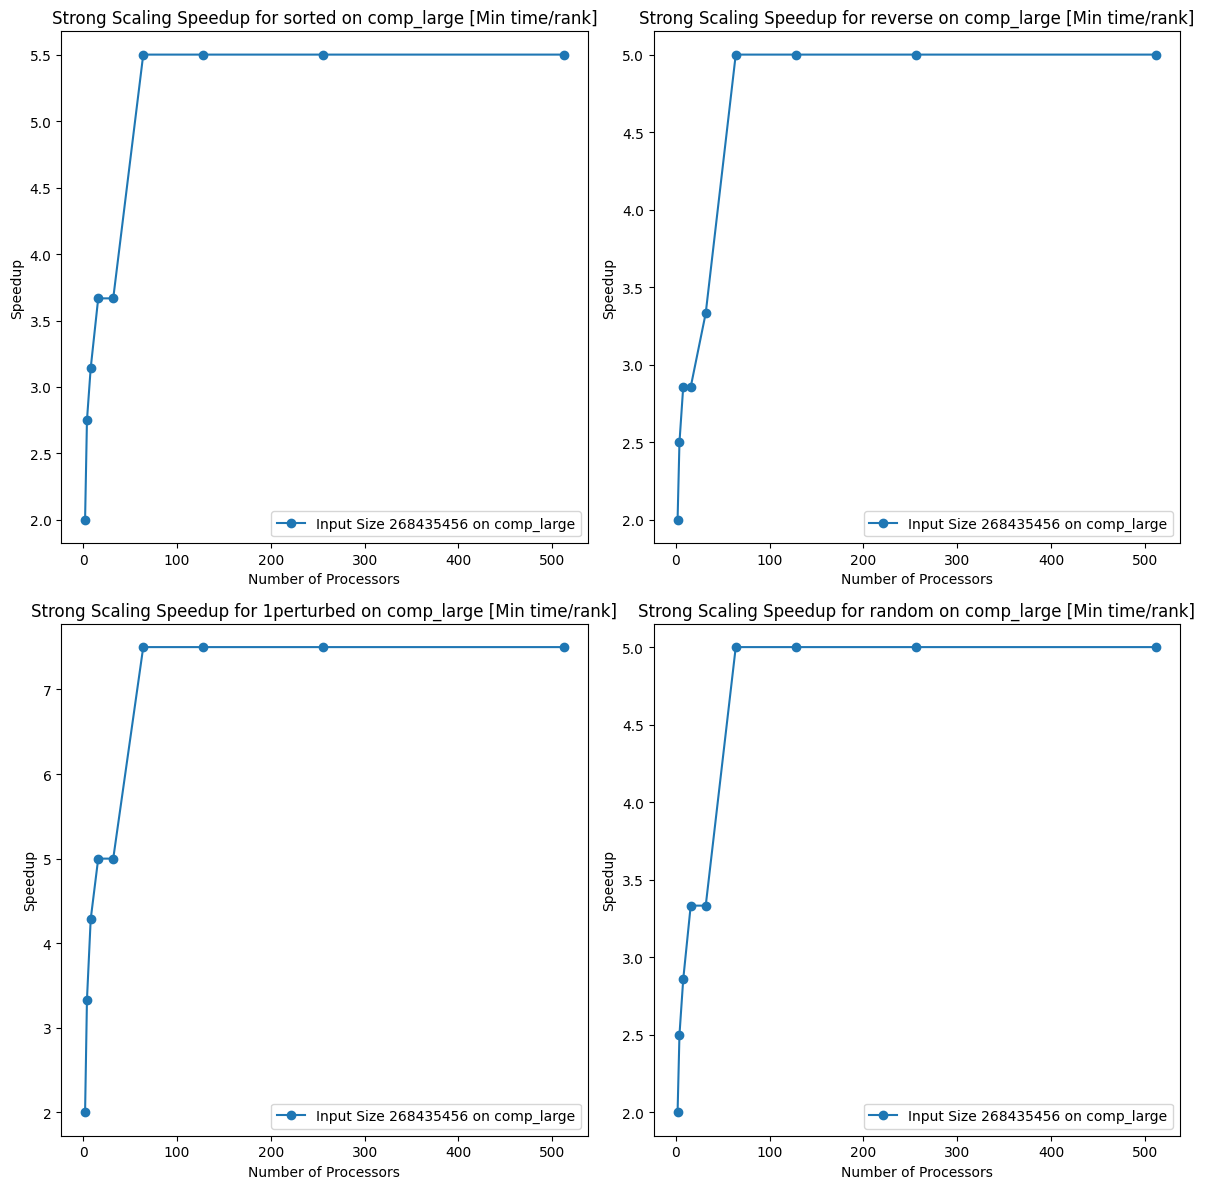

In [32]:
import os

input_sizes = [268435456] # Largest problem size
input_types = ["sorted", "reverse", "1perturbed", "random"]

# Change "type_selector" to the index of what you want to measure
time_types = ["Min time/rank", "Max time/rank", "Avg time/rank", "Total time", "Variance time/rank"]
file_output_label = ["min", "max", "avg", "total", "variance"]
type_selector = 0

# Prepare output folder for plots
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to create strong scaling speedup plots with 2x2 subplots
def plot_speedup(tk, input_types):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
            fig, axs = plt.subplots(2, 2, figsize=(12, 12))
            
            axs = axs.flatten()
            for idx, input_type in enumerate(input_types):
                ax = axs[idx]
                
                # Add node filter to baseline calculation
                baseline_time = tk.dataframe[
                    (tk.dataframe["num_procs"] == 2) & 
                    (tk.dataframe["input_type"] == input_type) &
                    (tk.dataframe['node'] == node)  # Added node filter
                ][time_types[type_selector]].values[0] * 2
                
                for input_size in input_sizes:
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) & 
                        (tk.dataframe["input_size"] == input_size) & 
                        (tk.dataframe['node'] == node)
                    ]
                    data = data.sort_values(by="num_procs")
                    
                    speedup = baseline_time / data[time_types[type_selector]]
                    ax.plot(data["num_procs"], speedup, marker='o', 
                           label=f'Input Size {input_size} on {node_name}')
                
                ax.set_title(f'Strong Scaling Speedup for {input_type} on {node_name} [{time_types[type_selector]}]')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Speedup')
                ax.legend()
            
            for j in range(idx + 1, len(axs)):
                fig.delaxes(axs[j])
            
            plt.tight_layout()
            filename = f'speedup_{file_output_label[type_selector]}_{input_type}_{node_name}_size{input_size}.png'
            filepath = os.path.join(output_dir, filename)
            plt.savefig(filepath, format='png', dpi=300)
            plt.show()



plot_speedup(tk, input_types)

In [33]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe

,index,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,0,"{'name': 'main', 'type': 'function'}",197811821,1.0,regionprofile,1156.333862,1156.386687,1156.367769,592060.297542,0.000093,1.742983,1.932726,1.834050,939.033432,NaN,NaN,NaN,NaN,main,512,random,268435456,merge
1,1,"{'name': 'main', 'type': 'function'}",272614657,1.0,regionprofile,163.018609,163.026996,163.023428,10433.499385,0.000009,1.525614,1.543076,1.533261,98.128735,NaN,NaN,NaN,NaN,main,64,random,268435456,merge
2,2,"{'name': 'main', 'type': 'function'}",410978651,1.0,regionprofile,192.293854,192.549152,192.475393,24636.850273,0.011034,1.831503,2.631753,2.062007,263.936862,NaN,NaN,NaN,NaN,main,128,reverse,268435456,merge
3,3,"{'name': 'main', 'type': 'function'}",487591188,1.0,regionprofile,87.446203,87.453228,87.449933,2798.397861,0.000006,1.552707,1.565271,1.560278,49.928901,NaN,NaN,NaN,NaN,main,32,sorted,268435456,merge
4,4,"{'name': 'main', 'type': 'function'}",620079786,1.0,regionprofile,158.141546,158.159816,158.149242,10121.551503,0.000061,1.555259,1.588935,1.573191,100.684222,NaN,NaN,NaN,NaN,main,64,1perturbed,268435456,merge
5,5,"{'name': 'main', 'type': 'function'}",753116936,1.0,regionprofile,1151.097458,1151.309107,1151.241025,589435.404623,0.002533,1.839022,2.012675,1.931715,989.038215,NaN,NaN,NaN,NaN,main,512,1perturbed,268435456,merge
6,6,"{'name': 'main', 'type': 'function'}",974582574,1.0,regionprofile,109.431758,109.431776,109.431767,218.863533,0.000000,1.024623,1.025428,1.025025,2.050051,NaN,NaN,NaN,NaN,main,2,1perturbed,268435456,merge
7,7,"{'name': 'main', 'type': 'function'}",991825787,1.0,regionprofile,580.730805,580.999202,580.935499,148719.487839,0.006438,1.946889,3.061837,2.834072,725.522548,NaN,NaN,NaN,NaN,main,256,sorted,268435456,merge
8,8,"{'name': 'main', 'type': 'function'}",1188575807,1.0,regionprofile,52.144413,52.150339,52.148747,417.189975,0.000003,0.566048,0.572299,0.570060,4.560483,NaN,NaN,NaN,NaN,main,8,1perturbed,268435456,merge
9,9,"{'name': 'main', 'type': 'function'}",1203639974,1.0,regionprofile,106.108201,106.210273,106.199392,6796.761088,0.000200,1.470094,1.575322,1.558403,99.737808,NaN,NaN,NaN,NaN,main,64,reverse,268435456,merge
